In [1]:
# Import modules
%pylab inline
rc('animation', html='html5')
import mizer

Populating the interactive namespace from numpy and matplotlib


number of size classes: 100 
number of prey: 91 
assimilation efficiency: 0.2 -
reproductive efficiency: 1.0 -
egg weight: 0.001 g
exponent of max. consumption: 0.666666666667 -
exponent of search volume: 0.82 -
exponent of standard metabolism: 0.7 -
type of background mortality (0: constant, 1: allometric function of size): 1 
pre-factor for background mortality: 0.1 yr-1
exponent of background mortality: -0.25 -
start weight for senescence mortality: 1000.0 g
exponent for senescence mortality: 0.3 -
maturation weight: 0.0 g
asymptotic weight: 1000000.0 g
preferred predator:prey mass ratio: 100.0 -
width of prey size preference (sd in ln weight units): 2.2 -
fraction of weight consisting of lipid reserve: 0.1 -
von Bertalanffy growth rate: 0.0 yr-1
exponent of background resource spectrum: 2.15333333333 -
carrying capacity of background resource spectrum: 1e+11 g^(lambda-1)
background feeding level: 0.6 -
stock-recruitment relationship (0: constant recruitment, 1: density-independent 

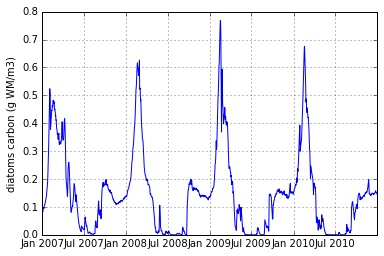

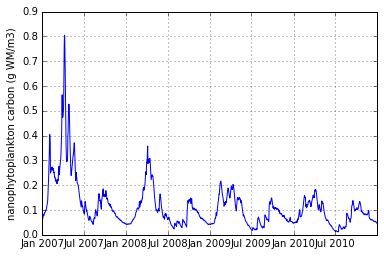

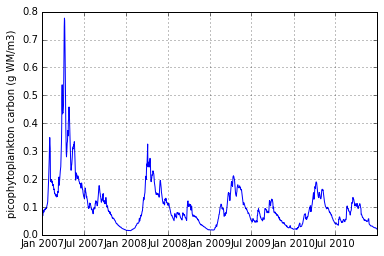

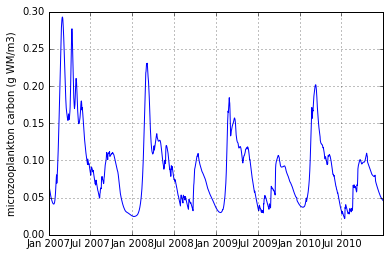

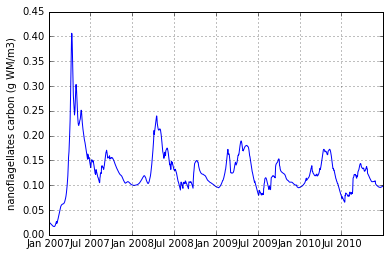

In [2]:
# mizer parameters
parameters = {
  'w_min': 1e-3,
  'w_inf': 1e6,
  'nclass': 100,
  'T_dependence': 1,
  'T_ref': 13.,
  'E_a': 0.63,
  'beta': 100,
  'sigma': 2.20,   # ln(10.)
  'gamma': 64.,
  'q': 0.82,
  'alpha': 0.2,
  'z0_type': 1,
  'z0pre': 0.1,
  'z0exp': -0.25,
  'w_s': 1000.,
  'z_s': 0.3,
  'ks': 0.,
  'SRR': 0,
  'recruitment': 10000,
  'h': 1e9,
  'w_minF': 1.25, # Blanchard et al 2012
  'F': 1.6
}

# Function for converting from Equivalent Spherical Diameter (micrometer) to wet mass in g
def esd2mass(d): # d: equivalent spherical diameter in micrometer
    V = 4./3.*pi*(numpy.array(d)/2e6)**3  # V: volume in m3
    return V*1e6  # mass in g approximately equals volume in m3 multiplied by 1e6 (assumes density of 1000 kg/m3)

# prey (currently from GOTM-ERSEM simulation)
path = r'..\..\ssb-ersem-git\testcases\ersem_gotm\L4\fabm_ref.nc'
path = r'..\..\ssb-ersem-git\testcases\ersem_gotm\L4\output/fabm_ref.nc'
scale_factor = 0.01 # 10 g wet mass/g carbon * 0.001 g C/mg C
prey = (
   mizer.Prey('diatoms', esd2mass((20,200)), mizer.datasources.TimeSeries(path, 'P1_c', z=-1, scale_factor=scale_factor)),
   mizer.Prey('nanophy', esd2mass((2,20)), mizer.datasources.TimeSeries(path, 'P2_c', z=-1, scale_factor=scale_factor)),
   mizer.Prey('picophy', esd2mass((.2,2)), mizer.datasources.TimeSeries(path, 'P3_c', z=-1, scale_factor=scale_factor)),
   #mizer.Prey('microphy', esd2mass((20,200)), mizer.datasources.TimeSeries(path, 'P4_c', z=-1, scale_factor=scale_factor)),
   mizer.Prey('microzoo', esd2mass((20,200)), mizer.datasources.TimeSeries(path, 'Z5_c', z=-1, scale_factor=scale_factor)),
   mizer.Prey('nanoflag', esd2mass((2,20)), mizer.datasources.TimeSeries(path, 'Z6_c', z=-1, scale_factor=scale_factor)),
   #mesozoo = mizer.Prey('mesozoo', 1e-4, mizer.datasources.TimeSeries(path, 'Z4_c', z=-1, scale_factor=scale_factor)),
)
prey_collection = mizer.PreyCollection(*prey)
prey_collection = mizer.GriddedPreyCollection(prey_collection)

# environment
#temp = mizer.datasources.TimeSeries(path, 'temp', z=-1)
temp = 15.

# create mizer model
m = mizer.Mizer(prey=prey_collection, parameters=parameters, temperature=temp)

In [5]:
# Time-integrate
times = numpy.arange(datestr2num('2002-01-01'), datestr2num('2010-01-01'))
result = m.run(times, spinup=50, verbose=True, save_spinup=False)

Spinning up from 1952-01-03 00:00:00+00:00 to 2002-01-01 00:00:00+00:00
Time integrating from 2002-01-01 00:00:00+00:00 to 2009-12-31 00:00:00+00:00
Done.


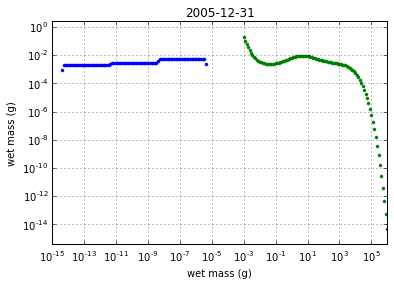

In [6]:
from ipywidgets import widgets
def show_spectrum(day):
    result.plot_spectrum(day, normalization=0, global_range=True)
slider = widgets.interact(show_spectrum, day=(0, len(result.t)-1))

<Container object of 7 artists>

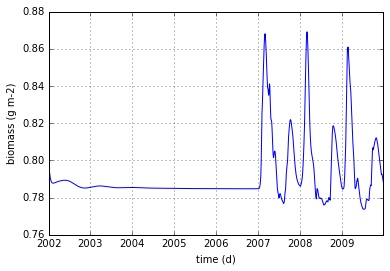

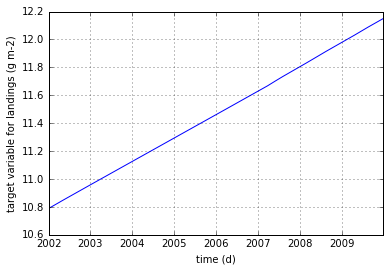

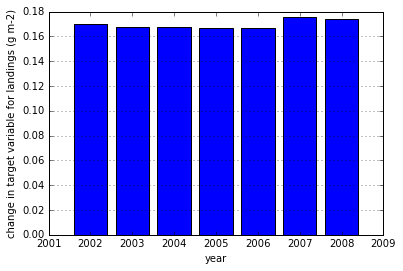

In [7]:
result.plot_biomass_timeseries()
result.plot_timeseries('landings')
result.plot_annual_mean('landings', plot_change=True)

In [ ]:
anim = result.animate_spectrum(normalization=0)

In [ ]:
anim